In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import sklearn
import  fuzzywuzzy.fuzz as fuzz
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
df=pd.read_csv("Training.csv")

In [83]:
df.drop_duplicates(inplace=True)
df.rename(columns={"mild_fever": "fever", "skin_rash": "rash","excessive_hunger":"hunger","throat_irritation":"throat pain","stomach_pain":1},inplace=True)
df.rename(columns={"mild_fever": "fever", "skin_rash": "rash","excessive_hunger":"hunger","throat_irritation":"throat pain","stomach_pain":1},inplace=True)

In [84]:
df.columns = df.columns.str.replace('_', ' ')


In [85]:
df.drop(np.nan, axis=1, inplace=True)
print(list(df.columns))

['itching', 'rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting  urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat pain', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal reg

In [86]:
len(df.columns)

132

In [87]:
for i in range(10):
 df = df.append({'prognosis' : 'Heart attack' , 'chest pain':1,'nausea':1,'neck pain':1,'arm pain':1,'breathlessness':1} , ignore_index=True)

In [88]:
for i in range(10):
 df= df.append({'prognosis' : 'Heart attack' , 'chest pain':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Common Cold' , 'cough':1,'headache':1} , ignore_index=True)

#Diabetes

 df = df.append({'prognosis' : 'Diabetes ' , 'fatigue':1,'hunger':1,"sweating":1,'':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Diabetes ' , 'fatigue':1,'hunger':1,"sweating":1,'':1,"painlessness":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Diabetes ' ,'hunger':1,"sweating":1,'blurred and distorted vision':1,"painlessness":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Diabetes ' ,'hunger':1,'blurred and distorted vision':1,"painlessness":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Diabetes ' ,'fatigue':1,'hunger':1,'blurred and distorted vision':1} , ignore_index=True)


In [89]:
len(df.columns)

135

In [90]:
#Dentist
for i in range(10):
 df= df.append({'prognosis' : 'dentist' , 'toothache':1,"cavity":1,"oral pain":1} , ignore_index=True)
 df= df.append({'prognosis' : 'dentist' , 'toothache':1} , ignore_index=True)
 df= df.append({'prognosis' : 'dentist' , 'toothache':1,"cavity":1} , ignore_index=True)
 df= df.append({'prognosis' : 'dentist' , 'toothache':1,"oral pain":1} , ignore_index=True)
 df= df.append({'prognosis' : 'dentist' ,"oral pain":1} , ignore_index=True)
 df= df.append({'prognosis' : 'dentist' , 'toothache':1,"oral pain":1} , ignore_index=True)
 df= df.append({'prognosis' : 'dentist' , 'toothache':1,"oral pain":1,"ulcers on tongue":1} , ignore_index=True)
 df= df.append({'prognosis' : 'dentist' , 'toothache':1,"ulcers on tongue":1} , ignore_index=True)
 df= df.append({'prognosis' : 'dentist' , 'toothache':1,"cavity":1,"oral pain":1,"ulcers on tongue":1} , ignore_index=True)
 df= df.append({'prognosis' : 'dentist' , "cavity":1} , ignore_index=True)
 df= df.append({'prognosis' : 'dentist' , "oral pain":1,"ulcers on tongue":1} , ignore_index=True)
 df= df.append({'prognosis' : 'dentist' , "ulcers on tongue":1} , ignore_index=True)

In [91]:
##Neurologist
for i in range(10):
 df= df.append({'prognosis' : 'neuroloigist' , 'fits':1,"paralaysis":1,"seizure":1,"mental confusion":1} , ignore_index=True)
 df= df.append({'prognosis' : 'neuroloigist' , 'fits':1} , ignore_index=True)
 df= df.append({'prognosis' : 'neuroloigist' , 'fits':1,"paralaysis":1} , ignore_index=True)
 df= df.append({'prognosis' : 'neuroloigist' , 'fits':1,"paralaysis":1,"seizure":1} , ignore_index=True)
 df= df.append({'prognosis' : 'neuroloigist' , 'fits':1,"paralaysis":1,"mental confusion":1} , ignore_index=True)
 df= df.append({'prognosis' : 'neuroloigist' ,"paralaysis":1,"seizure":1,"mental confusion":1} , ignore_index=True)
 df= df.append({'prognosis' : 'neuroloigist' ,"paralaysis":1} , ignore_index=True)

##Psycholoight

 df= df.append({'prognosis' : 'psychologist' , 'depression':1,"anxiety":1,"sucidal thoughts":1,"mental confusion":1} , ignore_index=True)
 df= df.append({'prognosis' : 'psychologist' , 'depression':1} , ignore_index=True)
 df= df.append({'prognosis' : 'psychologist' ,"anxiety":1,"sucidal thoughts":1,"mental confusion":1} , ignore_index=True)
 df= df.append({'prognosis' : 'psychologist' ,"sucidal thoughts":1} , ignore_index=True)
 df= df.append({'prognosis' : 'psychologist' ,'depression':1,"sucidal thoughts":1} , ignore_index=True)
 df= df.append({'prognosis' : 'psychologist' , 'depression':1,"sucidal thoughts":1,"mental confusion":1} , ignore_index=True)
 df= df.append({'prognosis' : 'psychologist' , 'depression':1,"sucidal thoughts":1,"lack of concentration":1} , ignore_index=True)
 df= df.append({'prognosis' : 'psychologist' , 'depression':1,"lack of concentration":1} , ignore_index=True)
 df= df.append({'prognosis' : 'psychologist' , "sucidal thoughts":1,"mental confusion":1} , ignore_index=True)
 df= df.append({'prognosis' : 'psychologist' ,'depression':1} , ignore_index=True)

##Fungal
 df = df.append({'prognosis' : 'Fungal infection' , 'itching':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Fungal infection' , 'itching':1,"rashes":1,"bumps":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Fungal infection' , 'itching':1,"rashes":1} , ignore_index=True)

##Thyroid
 df = df.append({'prognosis' : 'Hypothyroidism' , 'constipation':1,"weight gain":1,"tiredness":1,"fatigue":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Hypothyroidism' , 'constipation':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Hypothyroidism' , 'constipation':1,"weight gain":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Hypothyroidism' , 'constipation':1,"fatigue":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Hypothyroidism' , 'constipation':1,'stomach pain':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Hypothyroidism' , 'constipation':1,"vomiting":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Hypothyroidism' , 'stomach pain':1,"vomiting":1} , ignore_index=True)

In [92]:
len(df.columns)

147

In [93]:
##Heart Attack
for i in range(10):
 df= df.append({'prognosis' : 'Heart attack' , "shoulder pain":1,'chest pain':1,'nausea':1,'neck pain':1,'arm pain':1,'breathlessness':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Heart attack' , 'chest pain':1,'neck pain':1,'arm pain':1,'breathlessness':1,"dizziness":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Heart attack' , 'chest pain':1,'arm pain':1,'breathlessness':1,"dizziness":1,'fast heart rate':1} , ignore_index=True)
 df= df.append({'prognosis' : 'Heart attack' , 'chest pain':1,'arm pain':1,'breathlessness':1,"dizziness":1,'fast heart rate':1,"sweating":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Heart attack' , 'chest pain':1,"shoulder pain":1,'arm pain':1,'breathlessness':1,'fast heart rate':1,"sweating":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Heart attack' , 'chest pain':1,'arm pain':1,'breathlessness':1,"sweating":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Heart attack' , 'chest pain':1,'arm pain':1,'breathlessness':1,"sweating":1,"fatigue":1} , ignore_index=True)
 df= df.append({'prognosis' : 'Heart attack' , 'chest pain':1,"shoulder pain":1} , ignore_index=True)
 df= df.append({'prognosis' : 'Heart attack' , 'chest pain':1} , ignore_index=True)
 df= df.append({'prognosis' : 'Heart attack' , "shoulder pain":1,'chest pain':1,"arm pain":1} , ignore_index=True)


### Common Cold Symptoms
 df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'head ache':1,'fatigue':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'runny nose':1,'chills':1,'head ache':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'head ache':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'fatigue':1,'chills':1,'head ache':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Common Cold' , 'cough':1,'fatigue':1,'runny nose':1,'chills':1,'head ache':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'runny nose':1,'mild fever':1,'head ache':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'runny nose':1,'mild fever':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Common Cold' , 'cough':1,'headache':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'headache':1} , ignore_index=True)
 df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'fatigue':1} , ignore_index=True)

###Opthalmologist
 df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,'headache':1} , ignore_index=True)
 df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,"less vision":1} , ignore_index=True)
 df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1} , ignore_index=True)
 df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,"headache":1,"less vision":1,"blurred and distorted vision":1} , ignore_index=True)
 df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,"headache":1,"less vision":1,"red eye":1} , ignore_index=True)
 df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,"red eye":1} , ignore_index=True)
 df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1} , ignore_index=True)
 df = df.append({'prognosis' : 'ophthalmologist' , "red eye":1} , ignore_index=True)
 df = df.append({'prognosis' : 'ophthalmologist' , "headache":1,"less vision":1} , ignore_index=True)
 df = df.append({'prognosis' : 'ophthalmologist' , "red eye":1,"blurred and distorted vision":1} , ignore_index=True)

 df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,"watering from eyes":1} , ignore_index=True)
 df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,"headache":1,"less vision":1,"red eye":1,"watering from eyes":1} , ignore_index=True)

##Pediatrician
 df = df.append({'prognosis' : 'Pediatrician' , "child":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Pediatrician' , "child":1,"kid":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Pediatrician' , "child":1,"kid":1,"fever":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Pediatrician' , "baby":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Pediatrician' , "baby":1,"stomach pain":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Pediatrician' , "child":1,"stomach pain":1,"headache":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Pediatrician' , "child":1,"stomach pain":1,"headache":1,"fever":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Pediatrician' , "child":1,"fever":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Pediatrician' , "child":1,"stomach pain":1,"headache":1,"fever":1,"cough":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Pediatrician' , "baby":1,"stomach pain":1,"headache":1,"fever":1,"cough":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Pediatrician' , "kid":1,"stomach pain":1,"headache":1,"fever":1,"cough":1} , ignore_index=True)

 df = df.append({'prognosis' : 'Urinary tract infection' , "yellow urine":1,"polyuria":1,"foul smell of urine":1,"continuous feel of urine":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Urinary tract infection' , "foul smell of urine":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Urinary tract infection' ,"polyuria":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Urinary tract infection' , "yellow urine":1,"polyuria":1,"continuous feel of urine":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Urinary tract infection' , "continuous feel of urine":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Urinary tract infection' ,"polyuria":1,"foul smell of urine":1,"continuous feel of urine":1} , ignore_index=True)


 df = df.append({'prognosis' : '(vertigo) Paroymsal  Positional Vertigo' ,"ear pain":1,"throat pain":1} , ignore_index=True)
 df = df.append({'prognosis' : '(vertigo) Paroymsal  Positional Vertigo' ,"ear pain":1} , ignore_index=True)
 df = df.append({'prognosis' : '(vertigo) Paroymsal  Positional Vertigo' ,"throat pain":1} , ignore_index=True)

 df = df.append({'prognosis' : 'Arthritis' ,"joint pain":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Arthritis' ,"joint pain":1,"shoulder pain":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Arthritis' ,"joint pain":1,"shoulder pain":1,"hip joint pain":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Arthritis' ,"joint pain":1,"shoulder pain":1,"hip joint pain":1,"swelling joints":1} , ignore_index=True)
 df = df.append({'prognosis' : 'Arthritis' ,"joint pain":1,"shoulder pain":1,"swelling joints":1} , ignore_index=True)   

In [94]:
df.tail()

,itching,rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,acidity,ulcers on tongue,muscle wasting,...,shoulder pain,head ache,mild fever,eye pain,less vision,red eye,child,kid,baby,ear pain
1339,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1341,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1343,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
print(list(df.columns))

['itching', 'rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting  urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat pain', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal reg

In [96]:
df.fillna(0,inplace=True)

In [97]:
df.loc[df.prognosis == "Arthritis", 'joint pain'] = 1
df.loc[df.prognosis == "Osteoarthristis", 'joint pain'] = 1

In [98]:
df.loc[df.prognosis == "Heart attack", 'chest pain']

222     1.0
223     1.0
224     1.0
225     1.0
226     0.0
       ... 
1292    1.0
1293    1.0
1294    1.0
1295    1.0
1296    1.0
Name: chest pain, Length: 125, dtype: float64

In [99]:
df["prognosis"].value_counts()

Heart attack                               125
ophthalmologist                            120
dentist                                    120
Common Cold                                119
Pediatrician                               110
psychologist                               100
Hypothyroidism                              78
neuroloigist                                70
Urinary tract infection                     65
Diabetes                                    59
Arthritis                                   56
(vertigo) Paroymsal  Positional Vertigo     37
Fungal infection                            35
Hepatitis D                                 10
Chicken pox                                 10
Migraine                                    10
Dengue                                      10
Typhoid                                      9
hepatitis A                                  9
Hypoglycemia                                 9
Jaundice                                     9
Hepatitis B  

In [100]:
df["prognosis"].value_counts()

Heart attack                               125
ophthalmologist                            120
dentist                                    120
Common Cold                                119
Pediatrician                               110
psychologist                               100
Hypothyroidism                              78
neuroloigist                                70
Urinary tract infection                     65
Diabetes                                    59
Arthritis                                   56
(vertigo) Paroymsal  Positional Vertigo     37
Fungal infection                            35
Hepatitis D                                 10
Chicken pox                                 10
Migraine                                    10
Dengue                                      10
Typhoid                                      9
hepatitis A                                  9
Hypoglycemia                                 9
Jaundice                                     9
Hepatitis B  

In [101]:
col=df.columns
#col


In [102]:
raw_col=list(col)
len(raw_col)

157

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Columns: 157 entries, itching to ear pain
dtypes: float64(156), object(1)
memory usage: 1.6+ MB


In [104]:
display(df.head())
display(df.tail())

,itching,rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,acidity,ulcers on tongue,muscle wasting,...,shoulder pain,head ache,mild fever,eye pain,less vision,red eye,child,kid,baby,ear pain
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,itching,rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,acidity,ulcers on tongue,muscle wasting,...,shoulder pain,head ache,mild fever,eye pain,less vision,red eye,child,kid,baby,ear pain
1339,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1340,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1341,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1342,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1343,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Transforming Prognosis to Doctor Type

In [105]:
d=list(df["prognosis"].unique())
print(d)
len(d)

['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo', 'dentist', 'neuroloigist', 'psychologist', 'ophthalmologist', 'Pediatrician']


46

In [106]:
c=[2,1,3,3,1,
   3,1,11,3,5,
   6,1,7,8,3,1,
   1,1,1,3,3,3
   ,3,3,3,5,1,5,
   1,6,1,4,4,4,
   7,7,9,2,10,2,2,13,8,12,14,15]
len(c)

46

In [107]:
mapper={
    'general':1,
    'dermatoligist':2,
    'gastroentolist':3,
    'endocrinologist':4,
    'pulmonologist':5,
    'cardiologist':6,
    'orthopedist':7,
    'neurologist':8,
    'ENT':9,
    'urologist':10,
    "diabetics dep":11,
    "psychologist":12,
    "dentist":13,
    14:"ophthalmologist",
15:"pediatrician"}

invmap={1: 'general',
 2: 'dermatoligist',
 3: 'gastroentolist',
 4: 'endocrinologist',
 5: 'pulmonologist',
 6: 'cardiologist',
 7: 'orthopedist',
 8: 'neurologist',
 9: 'ENT',
 10: 'urologist',
 11: 'diabetics dep',
 12:"psychologist",
 13:"dentist",
14:"ophthalmologist",
15:"pediatrician"}

In [108]:
for i in range(46):
    print("{} for {} for {}".format(d[i],c[i],invmap[c[i]]))

Fungal infection for 2 for dermatoligist
Allergy for 1 for general
GERD for 3 for gastroentolist
Chronic cholestasis for 3 for gastroentolist
Drug Reaction for 1 for general
Peptic ulcer diseae for 3 for gastroentolist
AIDS for 1 for general
Diabetes  for 11 for diabetics dep
Gastroenteritis for 3 for gastroentolist
Bronchial Asthma for 5 for pulmonologist
Hypertension  for 6 for cardiologist
Migraine for 1 for general
Cervical spondylosis for 7 for orthopedist
Paralysis (brain hemorrhage) for 8 for neurologist
Jaundice for 3 for gastroentolist
Malaria for 1 for general
Chicken pox for 1 for general
Dengue for 1 for general
Typhoid for 1 for general
hepatitis A for 3 for gastroentolist
Hepatitis B for 3 for gastroentolist
Hepatitis C for 3 for gastroentolist
Hepatitis D for 3 for gastroentolist
Hepatitis E for 3 for gastroentolist
Alcoholic hepatitis for 3 for gastroentolist
Tuberculosis for 5 for pulmonologist
Common Cold for 1 for general
Pneumonia for 5 for pulmonologist
Dimorphic h

In [109]:
df[df["prognosis"]=="Arthritis"]["joint pain"]

268     1.0
269     1.0
270     1.0
271     1.0
272     1.0
273     1.0
826     1.0
827     1.0
828     1.0
829     1.0
830     1.0
883     1.0
884     1.0
885     1.0
886     1.0
887     1.0
940     1.0
941     1.0
942     1.0
943     1.0
944     1.0
997     1.0
998     1.0
999     1.0
1000    1.0
1001    1.0
1054    1.0
1055    1.0
1056    1.0
1057    1.0
1058    1.0
1111    1.0
1112    1.0
1113    1.0
1114    1.0
1115    1.0
1168    1.0
1169    1.0
1170    1.0
1171    1.0
1172    1.0
1225    1.0
1226    1.0
1227    1.0
1228    1.0
1229    1.0
1282    1.0
1283    1.0
1284    1.0
1285    1.0
1286    1.0
1339    1.0
1340    1.0
1341    1.0
1342    1.0
1343    1.0
Name: joint pain, dtype: float64

In [110]:
for i in range (15):
    print("{} times {} ".format(c.count(i),i))

0 times 0 
11 times 1 
4 times 2 
11 times 3 
3 times 4 
3 times 5 
2 times 6 
3 times 7 
2 times 8 
1 times 9 
1 times 10 
1 times 11 
1 times 12 
1 times 13 
1 times 14 


In [111]:
trans={key: c[d.index(key)] for key in d}    #Working

In [112]:
c[d.index("Acne")]  ##Checking

2

In [113]:
trans # Mapping Done

{'Fungal infection': 2,
 'Allergy': 1,
 'GERD': 3,
 'Chronic cholestasis': 3,
 'Drug Reaction': 1,
 'Peptic ulcer diseae': 3,
 'AIDS': 1,
 'Diabetes ': 11,
 'Gastroenteritis': 3,
 'Bronchial Asthma': 5,
 'Hypertension ': 6,
 'Migraine': 1,
 'Cervical spondylosis': 7,
 'Paralysis (brain hemorrhage)': 8,
 'Jaundice': 3,
 'Malaria': 1,
 'Chicken pox': 1,
 'Dengue': 1,
 'Typhoid': 1,
 'hepatitis A': 3,
 'Hepatitis B': 3,
 'Hepatitis C': 3,
 'Hepatitis D': 3,
 'Hepatitis E': 3,
 'Alcoholic hepatitis': 3,
 'Tuberculosis': 5,
 'Common Cold': 1,
 'Pneumonia': 5,
 'Dimorphic hemmorhoids(piles)': 1,
 'Heart attack': 6,
 'Varicose veins': 1,
 'Hypothyroidism': 4,
 'Hyperthyroidism': 4,
 'Hypoglycemia': 4,
 'Osteoarthristis': 7,
 'Arthritis': 7,
 '(vertigo) Paroymsal  Positional Vertigo': 9,
 'Acne': 2,
 'Urinary tract infection': 10,
 'Psoriasis': 2,
 'Impetigo': 2,
 'dentist': 13,
 'neuroloigist': 8,
 'psychologist': 12,
 'ophthalmologist': 14,
 'Pediatrician': 15}

In [114]:
df["prognosis"]=df["prognosis"].map(trans)

In [115]:
df["prognosis"]

0       2
1       2
2       2
3       2
4       2
       ..
1339    7
1340    7
1341    7
1342    7
1343    7
Name: prognosis, Length: 1344, dtype: int64

In [116]:
df["prognosis"].value_counts()

1     196
6     131
14    120
13    120
15    110
12    100
4      96
3      88
8      75
7      69
10     65
11     59
2      53
9      37
5      25
Name: prognosis, dtype: int64

In [117]:
invmap

{1: 'general',
 2: 'dermatoligist',
 3: 'gastroentolist',
 4: 'endocrinologist',
 5: 'pulmonologist',
 6: 'cardiologist',
 7: 'orthopedist',
 8: 'neurologist',
 9: 'ENT',
 10: 'urologist',
 11: 'diabetics dep',
 12: 'psychologist',
 13: 'dentist',
 14: 'ophthalmologist',
 15: 'pediatrician'}

In [118]:
df.loc[df.prognosis == 5, 'wheezing'] = 1
df.loc[df.prognosis == 11, 'frequent urination'] = 1


In [119]:
df.loc[df.prognosis==7,"joint pain"].value_counts()

1.0    63
0.0     6
Name: joint pain, dtype: int64

In [120]:
##Deleting Urologist,Virologist,ENT,pediatrc

In [121]:
print(list(df.columns))

['itching', 'rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting  urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat pain', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal reg

In [122]:
df.fillna(0,inplace=True)

In [123]:
df.tail()

,itching,rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,acidity,ulcers on tongue,muscle wasting,...,mild fever,eye pain,less vision,red eye,child,kid,baby,ear pain,wheezing,frequent urination
1339,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1340,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1341,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1342,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1343,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
df.rename(columns={"prognosis":"department"},inplace=True)
df[["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]]=pd.get_dummies(data=df["department"])

In [125]:
df.to_csv('cleaned_data.csv') 

In [126]:
print(list(df.columns))

['itching', 'rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting  urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat pain', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal reg

In [127]:
len(df.columns)

174

In [128]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["department","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"],axis=1),df[["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]] , test_size=0.20, random_state=42)

In [129]:
len(X_train.columns)

158

In [130]:
print(list(X_train.columns))

['itching', 'rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting  urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat pain', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal reg

In [131]:
#confusion_matrix(
  #  y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

In [132]:
classifier = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [133]:
classifier.score(X_test, y_test)

0.9776951672862454

In [134]:
pred=classifier.predict(X_test)

In [135]:
confusion_matrix(
    y_test.values.argmax(axis=1), pred.argmax(axis=1))

array([[48,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [136]:
model1=Sequential()
model1.add(Dense(100, kernel_initializer= "glorot_uniform", activation = "relu", input_dim = 158))
model1.add(Dense(15, activation = "softmax"))
model1.compile(optimizer = "Adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
history=model1.fit(X_train, y_train, epochs = 15,verbose=1,validation_data=[X_test,y_test])

Train on 1075 samples, validate on 269 samples
Epoch 1/15
1075/1075 [==============================] - 1s 567us/sample - loss: 2.4633 - accuracy: 0.3693 - val_loss: 2.1923 - val_accuracy: 0.6877
Epoch 2/15
1075/1075 [==============================] - 0s 78us/sample - loss: 1.9365 - accuracy: 0.7972 - val_loss: 1.6441 - val_accuracy: 0.8848
Epoch 3/15
1075/1075 [==============================] - 0s 76us/sample - loss: 1.3728 - accuracy: 0.8949 - val_loss: 1.0986 - val_accuracy: 0.9257
Epoch 4/15
1075/1075 [==============================] - 0s 80us/sample - loss: 0.8840 - accuracy: 0.9581 - val_loss: 0.6916 - val_accuracy: 0.9628
Epoch 5/15
1075/1075 [==============================] - 0s 83us/sample - loss: 0.5601 - accuracy: 0.9860 - val_loss: 0.4460 - val_accuracy: 0.9888
Epoch 6/15
1075/1075 [==============================] - 0s 80us/sample - loss: 0.3645 - accuracy: 0.9935 - val_loss: 0.2994 - val_accuracy: 0.9963
Epoch 7/15
1075/1075 [==============================] - 0s 78us/sample

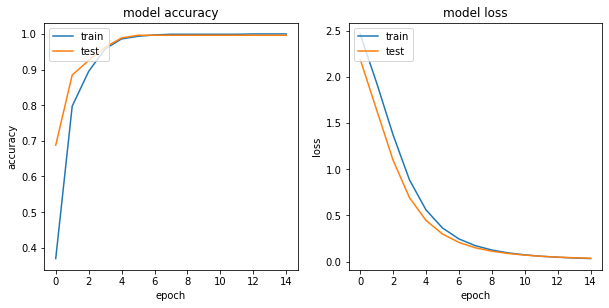

In [137]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [138]:
model2 = Sequential([
    tf.keras.layers.Dense(128, kernel_initializer= "GlorotNormal", activation = "relu", input_dim = 158),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(15, activation='softmax')
])                       ###Same Model Different type
model2.compile(optimizer = "Adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
history=model2.fit(X_train, y_train, epochs = 10,verbose=1,validation_data=[X_test,y_test])

Train on 1075 samples, validate on 269 samples
Epoch 1/10
1075/1075 [==============================] - 1s 575us/sample - loss: 2.5305 - accuracy: 0.4623 - val_loss: 2.2744 - val_accuracy: 0.7770
Epoch 2/10
1075/1075 [==============================] - 0s 77us/sample - loss: 1.8444 - accuracy: 0.8465 - val_loss: 1.4066 - val_accuracy: 0.8773
Epoch 3/10
1075/1075 [==============================] - 0s 73us/sample - loss: 0.9724 - accuracy: 0.9191 - val_loss: 0.6662 - val_accuracy: 0.9405
Epoch 4/10
1075/1075 [==============================] - 0s 78us/sample - loss: 0.4544 - accuracy: 0.9637 - val_loss: 0.3224 - val_accuracy: 0.9591
Epoch 5/10
1075/1075 [==============================] - 0s 74us/sample - loss: 0.2237 - accuracy: 0.9916 - val_loss: 0.1685 - val_accuracy: 0.9963
Epoch 6/10
1075/1075 [==============================] - 0s 77us/sample - loss: 0.1213 - accuracy: 0.9991 - val_loss: 0.0956 - val_accuracy: 0.9963
Epoch 7/10
1075/1075 [==============================] - 0s 75us/sample

In [139]:
model3 = Sequential([
    tf.keras.layers.Dense(128, kernel_initializer= "GlorotNormal", activation = "relu", input_dim = 158),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(15, activation='softmax')
])                       ###Same Model Different type
model3.compile(optimizer = "Adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
history=model3.fit(X_train, y_train, epochs = 10,verbose=1,validation_data=[X_test,y_test])

Train on 1075 samples, validate on 269 samples
Epoch 1/10
1075/1075 [==============================] - 1s 520us/sample - loss: 2.4015 - accuracy: 0.5600 - val_loss: 2.0070 - val_accuracy: 0.7249
Epoch 2/10
1075/1075 [==============================] - 0s 82us/sample - loss: 1.4770 - accuracy: 0.8279 - val_loss: 0.9991 - val_accuracy: 0.9071
Epoch 3/10
1075/1075 [==============================] - 0s 81us/sample - loss: 0.6372 - accuracy: 0.9367 - val_loss: 0.3922 - val_accuracy: 0.9851
Epoch 4/10
1075/1075 [==============================] - 0s 80us/sample - loss: 0.2569 - accuracy: 0.9926 - val_loss: 0.1664 - val_accuracy: 0.9963
Epoch 5/10
1075/1075 [==============================] - 0s 78us/sample - loss: 0.1137 - accuracy: 0.9972 - val_loss: 0.0833 - val_accuracy: 0.9963
Epoch 6/10
1075/1075 [==============================] - 0s 75us/sample - loss: 0.0601 - accuracy: 1.0000 - val_loss: 0.0503 - val_accuracy: 0.9963
Epoch 7/10
1075/1075 [==============================] - 0s 76us/sample

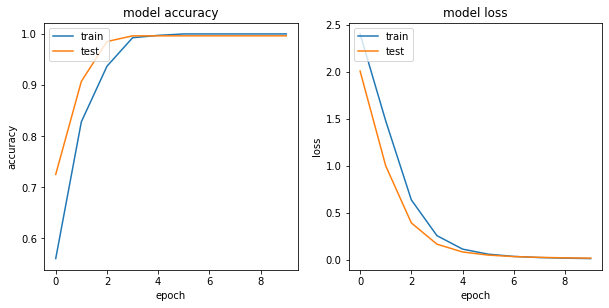

In [140]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [141]:
import pickle
filename = 'model4rf_4k.sav'


In [142]:
model1.save("my_model1_4k",save_format="tf")
model2.save("my_model2_4k",save_format="tf")
model3.save("my_model3_4k",save_format="tf")
pickle.dump(classifier, open(filename, 'wb'))


INFO:tensorflow:Assets written to: my_model1_4k\assets
INFO:tensorflow:Assets written to: my_model2_4k\assets
INFO:tensorflow:Assets written to: my_model3_4k\assets


## Stop HEre


In [143]:
##For 4000rows wala :
raw_col=['itching', 'rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting  urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat pain', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen legs', 'swollen blood vessels', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'hunger', 'extra marital contacts', 'drying and tingling lips', 'slurred speech', 'knee pain', 'hip joint pain', 'muscle weakness', 'stiff neck', 'swelling joints', 'movement stiffness', 'spinning movements', 'loss of balance', 'unsteadiness', 'weakness of one body side', 'loss of smell', 'bladder discomfort', 'foul smell of urine', 'continuous feel of urine', 'passage of gases', 'internal itching', 'toxic look (typhos)', 'depression', 'irritability', 'muscle pain', 'altered sensorium', 'red spots over body', 'belly pain', 'abnormal menstruation', 'dischromic  patches', 'watering from eyes', 'increased appetite', 'polyuria', 'family history', 'mucoid sputum', 'rusty sputum', 'lack of concentration', 'visual disturbances', 'receiving blood transfusion', 'receiving unsterile injections', 'coma', 'stomach bleeding', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload.1', 'blood in sputum', 'prominent veins on calf', 'palpitations', 'painful walking', 'pus filled pimples', 'blackheads', 'scurring', 'skin peeling', 'silver like dusting', 'small dents in nails', 'inflammatory nails', 'blister', 'red sore around nose', 'yellow crust ooze', 'department', 'arm pain', '', 'painlessness', 'cavity', 'oral pain', 'toothache', 'fits', 'mental confusion', 'paralaysis', 'seizure', 'sucidal thoughts', 'bumps', 'rashes', 'tiredness', 'stomach pain', 'shoulder pain', 'head ache', 'mild fever', 'eye pain', 'less vision', 'red eye', 'child', 'kid', 'baby', 'ear pain', 'wheezing', 'frequent urination', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']

def doctorguide1_4k(inp_sym):

    inp_sym=input_sym.split(sep=",")
    print("input_Symptoms parsed: ",inp_sym)

    symp_dict={key: 0 for key in raw_col}
    for i in inp_sym:
        if i in raw_col:
            symp_dict[i]=1
        else:
            for z in raw_col:
                fuzz_score=fuzz.token_set_ratio(i,z)
                if fuzz_score>70:
                    symp_dict[z]=1
    ##TESTING:
    for key,values in symp_dict.items():
        if values==1:
            print(key)
    df_run=pd.DataFrame(symp_dict,index=[1])
    model14k=tf.keras.models.load_model("my_model1_4k")
    pred=model14k.predict(df_run.drop(labels=["department","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"],axis=1).head(1))
   
  #  display("Prediction Raw Values : ",pred)  ##Testing
    value=list(pred.argmax(axis=1))
    display("prediction Argmax : ",value[0])  ##Testing    
    print("You can book doctors under {} section".format(invmap[value[0]+1]))
    
    
def doctorguide2_4k(inp_sym):

    inp_sym=input_sym.split(sep=",")
    print("input_Symptoms parsed: ",inp_sym)

    symp_dict={key: 0 for key in raw_col}
    for i in inp_sym:
        if i in raw_col:
            symp_dict[i]=1
        else:
            for z in raw_col:
                fuzz_score=(fuzz.partial_ratio(i,z)+fuzz.ratio(i,z))/2
                if fuzz_score>70:
                    symp_dict[z]=1
    ##TESTING:
    for key,values in symp_dict.items():
        if values==1:
            print(key)
    df_run=pd.DataFrame(symp_dict,index=[1])
    model24k=tf.keras.models.load_model("my_model2_4k")
    pred=model24k.predict(df_run.drop(labels=["department","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"],axis=1).head(1))
    #display("Prediction Raw Values : ",pred)  ##Testing
    value=list(pred.argmax(axis=1))
    display("prediction Argmax : ",value[0])  ##Testing    
    print("You can book doctors under {} section".format(invmap[value[0]+1]))

def doctorguide3_4k(inp_sym):

    inp_sym=input_sym.split(sep=",")
    print("input_Symptoms parsed: ",inp_sym)
    symp_dict={key: 0 for key in raw_col}
    for i in inp_sym:
        if i in raw_col:
            symp_dict[i]=1
        else:
            for z in raw_col:
                fuzz_score=(fuzz.partial_ratio(i,z)+fuzz.ratio(i,z))/2
                #fuzz_score=fuzz.partial_ratio(i,z)
                if fuzz_score>70:
                    symp_dict[z]=1
    ##TESTING:
    for key,values in symp_dict.items():
        if values==1:
            print(key)
    df_run=pd.DataFrame(symp_dict,index=[1])
    model24k=tf.keras.models.load_model("my_model2_4k")
    pred=model24k.predict(df_run.drop(labels=["department","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"],axis=1).head(1))
    #display("Prediction Raw Values : ",pred)  ##Testing
    value=list(pred.argmax(axis=1))
    display("prediction Argmax : ",value[0])  ##Testing    
    print("You can book doctors under {} section".format(invmap[value[0]+1]))
    
def doctorguider_rf4k(inp_sym):
    #input_sym=input("Enter your Symptoms seperated by comma ,If they are two words use (_)")
    #inp_sym=input_sym.split(sep=",")
    #print("input_Symptoms parsed: ",inp_sym)
    #raw_col=list(df.columns)
    symp_dict={key: 0 for key in raw_col}
    for i in inp_sym:
        if i in raw_col:
            symp_dict[i]=1
        else:
            for z in raw_col:
                fuzz_score=(fuzz.partial_ratio(i,z)+fuzz.ratio(i,z))/2
                if fuzz_score>70:
                    symp_dict[z]=1
    ##TESTING:
    for key,values in symp_dict.items():
        if values==1:
            print(key)
    df_run=pd.DataFrame(symp_dict,index=[1])
    classifier4k= pickle.load(open("model3_4k.sav", 'rb'))
    pred=classifier4k.predict(df_run.drop(labels=["department","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"],axis=1).head(1))
    

    #display("Prediction Raw Values : ",pred)  ##Testing
    value=list(pred.argmax(axis=1))
    print("value:",value)
    display("prediction Argmax : ",value[0])  ##Testing    
    print("You can book doctors under {} section".format(invmap[value[0]+1]))

In [144]:
input_sym=input("Enter your Symptoms seperated by comma")
inp_sym=input_sym.split(sep=",")
print("input_Symptoms parsed: ",inp_sym)
print("Model with 1 hidden layer :")
doctorguide1_4k(inp_sym)
print("#######")
print("######")
print("Model with 2 hidden layer :")
doctorguide2_4k(inp_sym)
print("Model with 2 hidden layer :")
doctorguide3_4k(inp_sym)
#print("Random Forest Model :")
#doctorguider_rf4k(inp_sym)

Enter your Symptoms seperated by commajoint pain
input_Symptoms parsed:  ['joint pain']
Model with 1 hidden layer :
input_Symptoms parsed:  ['joint pain']
joint pain


'prediction Argmax : '

6

You can book doctors under orthopedist section
#######
######
Model with 2 hidden layer :
input_Symptoms parsed:  ['joint pain']
joint pain


'prediction Argmax : '

6

You can book doctors under orthopedist section
Model with 2 hidden layer :
input_Symptoms parsed:  ['joint pain']
joint pain


'prediction Argmax : '

6

You can book doctors under orthopedist section
